<img src="https://github.com/hernancontigiani/ceia_memorias_especializacion/raw/master/Figures/logoFIUBA.jpg" width="500" align="center">


# Procesamiento de lenguaje natural
## LSTM many-to-many

### Datos
El objecto es utilizar una serie de sucuencias númericas (datos sintéticos) para poner a prueba el uso de las redes LSTM. Este ejemplo se inspiró en otro artículo, lo tienen como referencia en el siguiente link:\
[LINK](https://stackabuse.com/solving-sequence-problems-with-lstm-in-keras-part-2/)

In [3]:
import re

import numpy as np
import pandas as pd

from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM, SimpleRNN
from keras.models import Model
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers import Bidirectional

In [4]:
# Generar datos sintéticos
X = list()
y = list()

# En ambos casos "X" e "y" son vectores de números de 5 en 5
X = [x for x in range(5, 301, 5)]
y = [x+15 for x in X]

print(f"datos X (len={len(X)}):", X)
print(f"datos y (len={len(y)}):", y)

datos X (len=60): [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300]
datos y (len=60): [20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315]


In [12]:
# Se desea agrupar los datos de a 3 elementos
X = np.array(X).reshape(len(X)//3, 3, 1)
y = np.array(y).reshape(len(y)//3, 3, 1)
print("datos X[0:2]:", X[0:2])
print("datos y[0:2]:", y[0:2])

datos X[0:2]: [[[ 5]
  [10]
  [15]]

 [[20]
  [25]
  [30]]]
datos y[0:2]: [[[20]
  [25]
  [30]]

 [[35]
  [40]
  [45]]]


In [13]:
# Verificamos que la secuencia de entrada es igual a la secuencia de salida
# en cuanto a dimensiones
# Tendremos:
#  --> veinte grupos de datos (rows) (20)
#  --> cada grupo compuesto por tres elementos (3)
#  --> cada elemento representado en una sola dimension (1)
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (20, 3, 1)
y shape: (20, 3, 1)


In [14]:
# Cardinalidad (cantidad de elementos distintos en el dataset)
data = np.append(X, y)
len(np.unique(data))

63

### 2 - Entrenar el modelo

In [18]:
input_shape = X[0].shape
input_shape

(3, 1)

In [19]:
output_shape = y[0].shape
output_shape

(3, 1)

In [20]:
model = Sequential()

# input LSTM layer
# Aquí se transformar las entradas en features
# Retornarmos la secuencia para que la salida tenga la siguiente dimension:
#   --> (tamaño batch, tamaño serie, tamaño elemento)
# A diferencia de otra veces, estamos agregando el tamaño de la secuencia/serie
model.add(LSTM(128, activation='relu', input_shape=(input_shape), return_sequences=True))

# Al final tengo una salida (una secuencia) de 3 elementos juntos, 
# cada elemento de dimension 1:
# --> (3x1)
model.add(Dense(output_shape[-1]))

# Notar que en este caso la salida es con activación lineal
# estamos considerando el problema de inferencia como una regresión
# Esto será distinto cuando encaremos problemas de texto,
# en donde la salida serán términos discretos.

model.compile(loss='mse',
              optimizer="Adam")

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 3, 128)            66560     
                                                                 
 dense (Dense)               (None, 3, 1)              129       
                                                                 
Total params: 66689 (260.50 KB)
Trainable params: 66689 (260.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Esta arquitectura cumple lo solicitado, pero es bastante limitada y rebuscada. En el futuro y otros ejemplos veremos la arquitectura tipo encoder-decoder que es más flexible y "simétrica" que la utilizada en este caso.

In [22]:
hist = model.fit(X, y, epochs=500, validation_split=0.2, batch_size=5)

Epoch 1/500
4/4 [==============================] - 2s 131ms/step - loss: 22651.7051 - val_loss: 71068.1953
Epoch 2/500
4/4 [==============================] - 0s 13ms/step - loss: 19385.2109 - val_loss: 60762.7969
Epoch 3/500
4/4 [==============================] - 0s 13ms/step - loss: 17104.0234 - val_loss: 51652.5586
Epoch 4/500
4/4 [==============================] - 0s 14ms/step - loss: 14260.3037 - val_loss: 41093.9727
Epoch 5/500
4/4 [==============================] - 0s 12ms/step - loss: 11137.6738 - val_loss: 32468.4746
Epoch 6/500
4/4 [==============================] - 0s 12ms/step - loss: 9057.6572 - val_loss: 29502.9609
Epoch 7/500
4/4 [==============================] - 0s 12ms/step - loss: 8294.2285 - val_loss: 28656.4062
Epoch 8/500
4/4 [==============================] - 0s 15ms/step - loss: 7810.3687 - val_loss: 26529.7559
Epoch 9/500
4/4 [==============================] - 0s 12ms/step - loss: 7315.7715 - val_loss: 24515.3066
Epoch 10/500
4/4 [==============================]

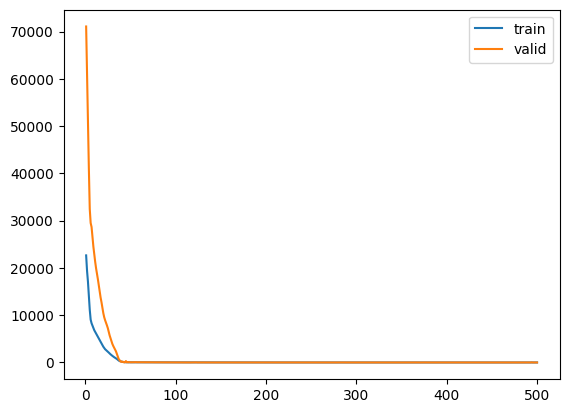

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento
epoch_count = range(1, len(hist.history['loss']) + 1)
sns.lineplot(x=epoch_count,  y=hist.history['loss'], label='train')
sns.lineplot(x=epoch_count,  y=hist.history['val_loss'], label='valid')
plt.show()

In [24]:
# Ensayo
x_test = [20, 25, 30]
y_test = [x+15 for x in x_test]

test_input = np.array([x_test])
test_input = test_input.reshape((1, 3, 1))
y_hat = model.predict(test_input, verbose=0)[0]

print("y_test:", y_test)
print("y_hat:", y_hat[0], y_hat[1], y_hat[2])

model.evaluate(test_input, np.array([y_test]))

y_test: [35, 40, 45]
y_hat: [36.225056] [39.9846] [44.798885]
1/1 [==============================] - 0s 420ms/step - loss: 0.5138


0.5138152241706848